In [110]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import networkx as nx
from nanonets import NanoparticleElectrostatic, Simulation

plt.style.use(["science","bright","grid"])

FILE_PATH       = "data/"
ELE_CHARGE_A_C  = 0.160217662

In [124]:
L_VALUES    = np.arange(3,16)
cap_mat     = {}
lam_mat     = {}
ele_mat     = {}
pos_mat     = {}
self_cap    = {}
for L in L_VALUES:
    # Electrode Positions
    e_pos = [[(L-1)//2, 0],[0, 0],[L-1, 0],[0, (L-1)//2],[L-1, (L-1)//2],[0, L-1],[L-1, L-1],[(L-1)//2, L-1]]

    # Build Network and attach Electrodes
    lattice = NanoparticleElectrostatic()
    lattice.lattice_network(L,L)
    lattice.add_electrodes_to_lattice_net(e_pos)
    lattice.init_nanoparticle_radius()
    lattice.pack_lattice()

    lattice.load_capacitance_matrix(f"{FILE_PATH}c_mat_{L}.csv")
    lattice.load_electrode_capacitance_matrix(f"{FILE_PATH}c_ele_{L}.csv")

    cap_mat[L] = lattice.get_capacitance_matrix()
    ele_mat[L] = lattice.get_electrode_capacitance_matrix()
    pos_mat[L] = lattice.get_positions()
    lam_mat[L] = lattice.get_inv_capacitance_matrix()@ele_mat[L].T


    diag_ele = np.diag(cap_mat[L])
    off_diag = np.sum(cap_mat[L],axis=1) - diag_ele
    self_cap[L] = diag_ele + off_diag - np.sum(ele_mat[L],axis=0)

In [129]:
np.corrcoef(lam_mat[9])

array([[ 1.        ,  0.88552877,  0.32277953, ..., -0.30791722,
        -0.35901953, -0.25935745],
       [ 0.88552877,  1.        ,  0.71370096, ..., -0.40381877,
        -0.48118422, -0.35901953],
       [ 0.32277953,  0.71370096,  1.        , ..., -0.33760787,
        -0.40381877, -0.30791722],
       ...,
       [-0.30791722, -0.40381877, -0.33760787, ...,  1.        ,
         0.71370096,  0.32277953],
       [-0.35901953, -0.48118422, -0.40381877, ...,  0.71370096,
         1.        ,  0.88552877],
       [-0.25935745, -0.35901953, -0.30791722, ...,  0.32277953,
         0.88552877,  1.        ]])

In [122]:
[np.max(1000*np.diag(np.linalg.inv(cap_mat[L]))*(ELE_CHARGE_A_C**2)*6.2415090745/2) for L in L_VALUES]

[11.75105955630024,
 16.599755553010194,
 16.6280372956203,
 17.240209681144144,
 17.240137020504353,
 17.38967446148227,
 17.389497722896277,
 17.429616021135516,
 17.42957387429986,
 17.441080641949235,
 17.441072784220943,
 17.444537210621103,
 17.444535870608142]

---

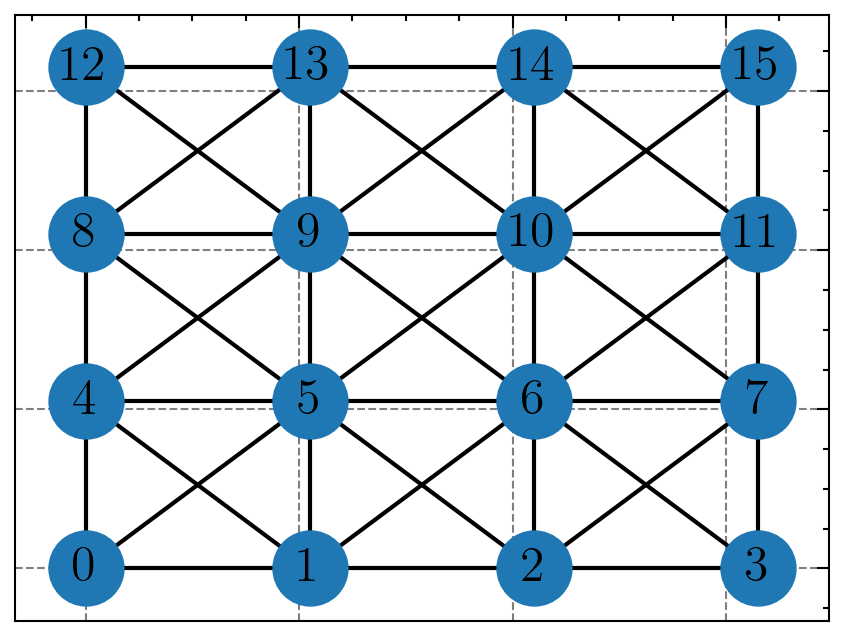

In [33]:
L = 4
a = np.abs(cap_mat[L])
np.fill_diagonal(a, 0)

G   = nx.from_numpy_array(a)
fig = plt.figure(dpi=300)
ax  = fig.add_subplot()
_   = nx.draw_networkx(G, pos=pos_mat[L], ax=ax)

In [ ]:
fig = plt.figure(dpi=200, layout='constrained')
# fig.set_figwidth(fig.get_figwidth()*1.8)
fig.set_figheight(fig.get_figheight()*1.4)
for i, N in enumerate([3,5,7,9]):
    ax              = fig.add_subplot(2,2,i+1)
    N_x, N_y        = N,N
    electrode_pos   = [[0,0],[N_x//2,0],[N_x-1,0],[0,(N_y-1)//2],[N_x-1,(N_y-1)//2],[0,N_y-1],[N_x//2,N_y-1],[N_x-1,N_y-1]]
    lattice_net     = NanoparticleElectrostatic()

    # Build Network and attach Electrodes
    lattice_net.lattice_network(N_x, N_y)
    lattice_net.add_electrodes_to_lattice_net(electrode_pos)
    lattice_net.init_nanoparticle_radius()
    lattice_net.pack_for_cubic()

    G_lat   = lattice_net.get_graph()
    pos_lat = lattice_net.get_positions()
    rad_lat = lattice_net.get_radius()

    fig,ax  = display_network(G_lat, pos_lat, rad_lat, fig=fig, ax=ax)
    _       = ax.set_xlim(-50,300)
    _       = ax.set_ylim(-50,300)
    _       = ax.set_title("$N_\\textrm{NP} = "+f"{N*N}$")
    if i >= 2:
        _ = ax.set_xlabel("$x$ [nm]")
    else:
        _ = ax.set_xticklabels("")
    if i % 2 == 0:
        _ = ax.set_ylabel("$y$ [nm]")
    else:
        _ = ax.set_yticklabels("")
    
fig.savefig("lattice_vs_system_size.pdf")